In [1]:
pip install ultralytics roboflow --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
from roboflow import Roboflow

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xhrv1vhssXAU1lyrPCyb")
project = rf.workspace("visionme").project("philippine-license-plates-mefb8")
version = project.version(1)
dataset = version.download("yolov8")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\athel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Philippine-license-plates-1 in yolov8:: 100%|██████████| 318/318 [00:00<00:00, 954.96it/s]


In [4]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import os

os.system("pip uninstall ultralytics -y")
os.system("pip install ultralytics==8.0.20")

0

In [6]:
from ultralytics import YOLO

# Load the nano model (very lightweight)
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data=r"C:\Users\athel\OneDrive\Documents\GitHub\dspCPE4A2526\activity9\Philippine-license-plates-1\data.yaml",
    epochs=20,
    imgsz=416,          # Smaller image size saves RAM
    batch=8,            # Lower batch for low RAM
    plots=True
)

Ultralytics 8.3.202  Python-3.13.7 torch-2.8.0+cpu CPU (AMD Ryzen 5 3500 6-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\athel\OneDrive\Documents\GitHub\dspCPE4A2526\activity9\Philippine-license-plates-1\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optim

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C3B6700870>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [8]:
model = YOLO("runs/detect/train/weights/best.pt")

In [16]:
image_path = "plate1.jpg"
results = model(image_path, conf=.5) 
results[0].show()


image 1/1 c:\Users\athel\OneDrive\Documents\GitHub\dspCPE4A2526\activity9\plate1.jpg: 288x416 1 license-plate, 124.4ms
Speed: 2.6ms preprocess, 124.4ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 416)


In [11]:
pip install pytesseract opencv-python pillow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'E:\tesseract\tesseract.exe'

In [19]:
# Cell 1: Import required libraries
import cv2
import numpy as np
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set Tesseract path (adjust this to your installation)
pytesseract.pytesseract.tesseract_cmd = r'E:\tesseract\tesseract.exe'

In [20]:
# Cell 2: Load your trained model
model = YOLO("runs/detect/train/weights/best.pt")

In [21]:
# Cell 3: Define preprocessing functions
def preprocess_plate_image(plate_img):
    """
    Preprocess the cropped plate image for better OCR results
    """
    # Convert to grayscale if it's not already
    if len(plate_img.shape) == 3:
        gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    else:
        gray = plate_img
    
    # Resize image to improve OCR accuracy (make it larger)
    height, width = gray.shape
    scale_factor = max(2, 200 // height)  # Ensure minimum height of 200px
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    resized = cv2.resize(gray, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(resized, (3, 3), 0)
    
    # Apply threshold to get binary image
    # Try different thresholding methods
    thresh1 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    thresh2 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # Apply morphological operations to clean up the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    cleaned1 = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel)
    cleaned2 = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel)
    
    return [resized, cleaned1, cleaned2]

def extract_text_from_plate(plate_img):
    """
    Extract text from a license plate image using Tesseract OCR
    """
    # Preprocess the image
    processed_images = preprocess_plate_image(plate_img)
    
    # Tesseract configuration for license plates
    # --psm 8: Treat the image as a single word
    # --psm 7: Treat the image as a single text line
    # -c tessedit_char_whitelist: Only allow specific characters
    configs = [
        '--psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',
        '--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',
        '--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',
        '--psm 13 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    ]
    
    best_text = ""
    best_confidence = 0
    
    # Try different preprocessing and configurations
    for img in processed_images:
        for config in configs:
            try:
                # Get text with confidence scores
                data = pytesseract.image_to_data(img, config=config, output_type=pytesseract.Output.DICT)
                
                # Extract text and calculate average confidence
                words = []
                confidences = []
                for i, conf in enumerate(data['conf']):
                    if int(conf) > 30:  # Only consider words with confidence > 30
                        text = data['text'][i].strip()
                        if text:
                            words.append(text)
                            confidences.append(int(conf))
                
                if words and confidences:
                    extracted_text = ''.join(words)
                    avg_confidence = sum(confidences) / len(confidences)
                    
                    # Keep the result with highest confidence
                    if avg_confidence > best_confidence:
                        best_text = extracted_text
                        best_confidence = avg_confidence
                        
            except Exception as e:
                continue
    
    return best_text, best_confidence

In [22]:
# Cell 4: Main function to detect plates and extract text
def detect_and_extract_plate_text(image_path, confidence_threshold=0.5):
    """
    Detect license plates and extract text from them
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run YOLO detection
    results = model(image_path, conf=confidence_threshold)
    
    plate_texts = []
    
    # Process each detection
    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                # Get bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                confidence = box.conf[0]
                
                # Add some padding around the detected plate
                padding = 10
                x1 = max(0, x1 - padding)
                y1 = max(0, y1 - padding)
                x2 = min(image.shape[1], x2 + padding)
                y2 = min(image.shape[0], y2 + padding)
                
                # Crop the license plate region
                plate_crop = image[y1:y2, x1:x2]
                
                # Extract text from the cropped plate
                plate_text, ocr_confidence = extract_text_from_plate(plate_crop)
                
                if plate_text:
                    plate_texts.append({
                        'text': plate_text,
                        'bbox': (x1, y1, x2, y2),
                        'yolo_confidence': float(confidence),
                        'ocr_confidence': ocr_confidence,
                        'plate_image': plate_crop
                    })
    
    return image_rgb, plate_texts

# Function to display results
def display_results(image, plate_data):
    """
    Display the image with bounding boxes and extracted text
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    for i, plate in enumerate(plate_data):
        x1, y1, x2, y2 = plate['bbox']
        text = plate['text']
        yolo_conf = plate['yolo_confidence']
        ocr_conf = plate['ocr_confidence']
        
        # Draw bounding box
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                           fill=False, color='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Add text annotation
        plt.text(x1, y1-10, f'{text}\nYOLO: {yolo_conf:.2f}, OCR: {ocr_conf:.1f}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=10, color='black')
    
    plt.axis('off')
    plt.title('License Plate Detection and Text Extraction')
    plt.tight_layout()
    plt.show()
    
    # Display individual plate crops
    if plate_data:
        fig, axes = plt.subplots(1, len(plate_data), figsize=(15, 3))
        if len(plate_data) == 1:
            axes = [axes]
        
        for i, plate in enumerate(plate_data):
            axes[i].imshow(cv2.cvtColor(plate['plate_image'], cv2.COLOR_BGR2RGB))
            axes[i].set_title(f"Extracted: '{plate['text']}'\nOCR Conf: {plate['ocr_confidence']:.1f}")
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()


image 1/1 c:\Users\athel\OneDrive\Documents\GitHub\dspCPE4A2526\activity9\plate1.jpg: 288x416 1 license-plate, 91.3ms
Speed: 1.4ms preprocess, 91.3ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 416)
DETECTED LICENSE PLATES:

Plate #1:
  Number: AHA
  YOLO Confidence: 0.94
  OCR Confidence: 96.0
  Bounding Box: (493, 474, 711, 570)
------------------------------

SUMMARY - All detected plate numbers: ['AHA']


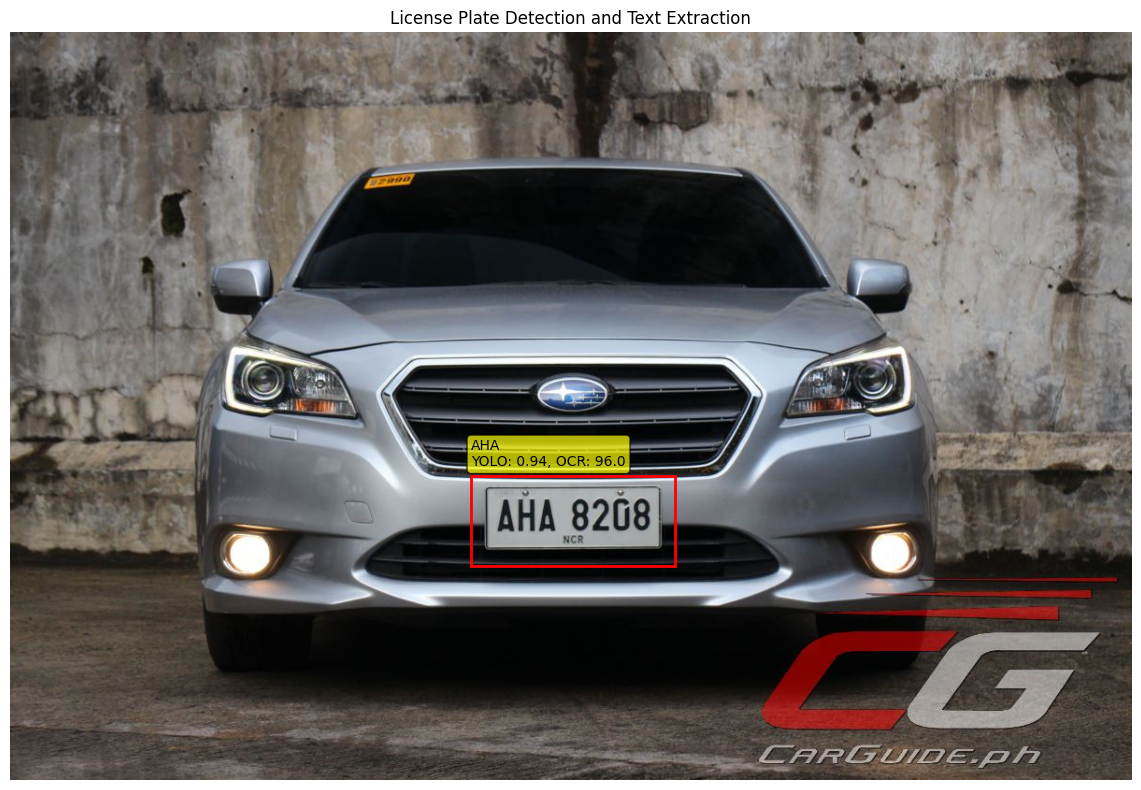

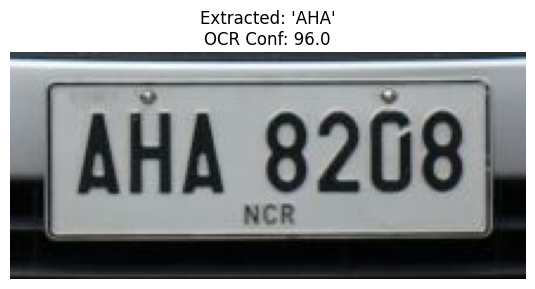

In [23]:
# Cell 5: Test the complete pipeline
image_path = "plate1.jpg"  # Change this to your image path

# Detect plates and extract text
image, plate_results = detect_and_extract_plate_text(image_path, confidence_threshold=0.5)

# Display results
if plate_results:
    print("=" * 50)
    print("DETECTED LICENSE PLATES:")
    print("=" * 50)
    
    for i, plate in enumerate(plate_results, 1):
        plate_number = plate['text'].strip()
        yolo_conf = plate['yolo_confidence']
        ocr_conf = plate['ocr_confidence']
        
        print(f"\nPlate #{i}:")
        print(f"  Number: {plate_number}")
        print(f"  YOLO Confidence: {yolo_conf:.2f}")
        print(f"  OCR Confidence: {ocr_conf:.1f}")
        print(f"  Bounding Box: {plate['bbox']}")
        print("-" * 30)
    
    # Summary of all detected plate numbers
    all_plate_numbers = [plate['text'].strip() for plate in plate_results]
    print(f"\nSUMMARY - All detected plate numbers: {all_plate_numbers}")
    
    display_results(image, plate_results)
else:
    print("No license plates detected or no text could be extracted.")
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title('No License Plates Detected')
    plt.axis('off')
    plt.show()

Simple OCR approach:

image 1/1 c:\Users\athel\OneDrive\Documents\GitHub\dspCPE4A2526\activity9\plate1.jpg: 288x416 1 license-plate, 50.7ms
Speed: 2.8ms preprocess, 50.7ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 416)
Detected text: 'AHA8268'


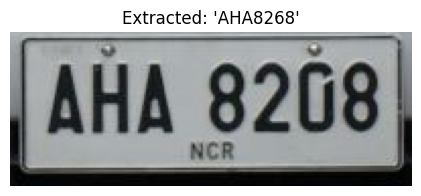

In [24]:
# Cell 6: Alternative simpler approach (if the above doesn't work well)
def simple_plate_ocr(image_path):
    """
    Simplified approach - just run OCR on detected plate regions
    """
    # Load image and run detection
    results = model(image_path, conf=0.5)
    image = cv2.imread(image_path)
    
    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                # Get coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Crop plate region
                plate_crop = image[y1:y2, x1:x2]
                
                # Simple OCR
                text = pytesseract.image_to_string(plate_crop, 
                                                 config='--psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                
                print(f"Detected text: '{text.strip()}'")
                
                # Display the cropped plate
                plt.figure(figsize=(6, 2))
                plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
                plt.title(f"Extracted: '{text.strip()}'")
                plt.axis('off')
                plt.show()

# Test the simple approach
print("Simple OCR approach:")
simple_plate_ocr("plate1.jpg")